# Explore here

In [ ]:
import os
import pandas as pd
import matplotlib as plt
import seaborn as sns
from dotenv import load_dotenv

load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [6]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [4]:
lz_uri = 'spotify:artist:2o5jDhtHVPhrJdv3cEQ99Z'

In [7]:
top_tracks = sp.artist_top_tracks(lz_uri)

In [8]:
tracks_data = []
for track in top_tracks['tracks']:
    tracks_data.append({
        'Nombre': track['name'],
        'Popularidad': track['popularity'],
        'Duración (ms)': track['duration_ms'],
    })

In [10]:
df = pd.DataFrame(tracks_data)
df

,Nombre,Popularidad,Duración (ms)
0,Thank You (Not So Bad),85,140000
1,10:35,76,172252
2,Lay Low,73,153442
3,The Motto,72,164818
4,The Business,70,164000
5,CONTIGO (with Tiësto),78,192786
6,Mockingbird,78,154838
7,Don't Be Shy,65,140500
8,Jackie Chan,69,215759
9,I Follow Rivers (feat. Oaks),69,198750


In [13]:
df_sorted = df.sort_values(by='Popularidad', ascending=True)
top_3_menos_populares = df_sorted.head(3)

print("Top 3 canciones menos populares:")
print(top_3_menos_populares[['Nombre', 'Popularidad', 'Duración (ms)']])

Top 3 canciones menos populares:
                         Nombre  Popularidad  Duración (ms)
7                  Don't Be Shy           65         140500
8                   Jackie Chan           69         215759
9  I Follow Rivers (feat. Oaks)           69         198750


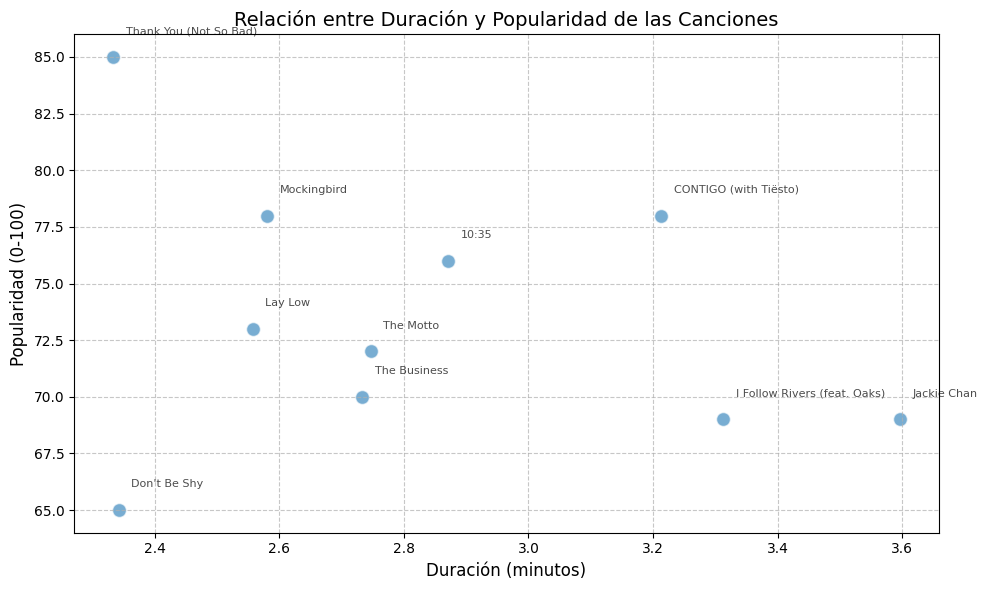

In [ ]:
import matplotlib.pyplot as plt

# Convertir la duración de milisegundos a minutos para mejor interpretación
df['Duración (min)'] = df['Duración (ms)'] / 60000

# Crear el scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['Duración (min)'], df['Popularidad'], alpha=0.6, edgecolors='w', s=100)

# Añadir títulos y etiquetas
plt.title('Relación entre Duración y Popularidad de las Canciones', fontsize=14)
plt.xlabel('Duración (minutos)', fontsize=12)
plt.ylabel('Popularidad (0-100)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir etiquetas con los nombres de las canciones
for i, row in df.iterrows():
    plt.text(row['Duración (min)']+0.02, row['Popularidad']+1, row['Nombre'], 
             fontsize=8, alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Tendencias principales

- Las canciones más cortas (~2.4-3.0 min) parecen tener mayor popularidad (ej. "Don't Be Shy" en el extremo izquierdo).

- Canciones más largas (~3.4-3.6 min) muestran popularidad ligeramente menor (aunque el rango es pequeño).

Outliers notables

- "Thank You (Not So Bad)": Destaca con popularidad 85. Podría ser un éxito atípico que rompe la tendencia.

- "Follow Rivers" y "Jackie Chan": Su posición podría indicar que son canciones más largas con popularidad media.

Conclusiones preliminares

- En este conjunto de datos, las canciones más cortas tienden a ser más populares.

- Canciones como "Thank You (Not So Bad)" (alta popularidad) sugieren que factores como melodía, artista o marketing pueden pesar más que la duración.